<a href="https://colab.research.google.com/github/Bady9898/Text-mining/blob/main/Amazon_Pavilion_laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Link= https://www.amazon.in/product-reviews/B07H3TF8L7/ref=pd_sbs_2_cr_sccl_3/000-0000000-0000000?pd_rd_w=Ecbmc&pf_rd_p=f7f53f20-c5e9-46f6-80ca-3dc93baa1685&pf_rd_r=07GQTRRWWWHWAZ3ARE5D&pd_rd_r=c9a4be17-446c-4047-bb00-514210627d7c&pd_rd_wg=uAygf&pd_rd_i=B07H3TF8L7

In [2]:
pip install autoscraper

In [8]:
#import libraries
from autoscraper import AutoScraper
import pandas as pd
import numpy as np
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
amazon_url= 'https://www.amazon.in/product-reviews/B07H3TF8L7/ref=pd_sbs_2_cr_sccl_3/000-0000000-0000000?pd_rd_w=Ecbmc&pf_rd_p=f7f53f20-c5e9-46f6-80ca-3dc93baa1685&pf_rd_r=07GQTRRWWWHWAZ3ARE5D&pd_rd_r=c9a4be17-446c-4047-bb00-514210627d7c&pd_rd_wg=uAygf&pd_rd_i=B07H3TF8L7'
wanted_list = ["Lokesh Bagaria","First I have doubt that it will be received in good condition or not and It will work or not. But no need to Worry. Product is Genuine.. Thanks Amazon."]

In [20]:
amazon_url2= 'https://www.amazon.in/product-reviews/B081JZTVWZ'
wanted_list = ["Sreenivas Andrajula","Good"]

In [21]:
scraper = AutoScraper()
result = scraper.build(amazon_url2,wanted_list)
print(result)

['Arun Aura', ':(', 'Aathira', 'Sreenivas Andrajula', 'Amazon Customer', 'Ameya Borkar', 'Gyana', 'Yogesh', 'Pankaj', 'Niharika Jain', "Really a good laptop for this price segment from HP , I've used it for a month , I've used all ADOBE softwares and games really very fast and aggressive ,some issues present in the operating system which may be cured over an update , overall build quality is very good .", 'Screen was bent, clearly visible. Status is checked with other same model laptops recently purchased by others and it is observed that the laptop is faulty. Multiples requests to  return the product / replace the product was denied through not connecting the customer call within the 10 Day period. Confirmation for taking proper action within 24Hr of the online chat was also not adhered to. The faulty laptop is not taken back by Amazon!', 'Good', 'Product was damaged and issue was raised on 4th July through App and Website. The returns and replacement section does not acknowledge your

In [22]:
scraper.get_result_similar(amazon_url2,grouped=True)

{'rule_lx9q': ['Arun Aura',
  ':(',
  'Aathira',
  'Sreenivas Andrajula',
  'Amazon Customer',
  'Ameya Borkar',
  'Gyana',
  'Yogesh',
  'Pankaj',
  'Niharika Jain'],
 'rule_y3tv': ["Really a good laptop for this price segment from HP , I've used it for a month , I've used all ADOBE softwares and games really very fast and aggressive ,some issues present in the operating system which may be cured over an update , overall build quality is very good .",
  ':(',
  'Screen was bent, clearly visible. Status is checked with other same model laptops recently purchased by others and it is observed that the laptop is faulty. Multiples requests to  return the product / replace the product was denied through not connecting the customer call within the 10 Day period. Confirmation for taking proper action within 24Hr of the online chat was also not adhered to. The faulty laptop is not taken back by Amazon!',
  'Good',
  'Product was damaged and issue was raised on 4th July through App and Website.

In [23]:
scraper.set_rule_aliases({'rule_y3tv':"Review"})
scraper.keep_rules(['rule_y3tv'])
scraper.save("amazon-search")

In [24]:
results = scraper.get_result_similar("https://www.amazon.in/product-reviews/B081JZTVWZ",group_by_alias=True)
results["Review"]

["Really a good laptop for this price segment from HP , I've used it for a month , I've used all ADOBE softwares and games really very fast and aggressive ,some issues present in the operating system which may be cured over an update , overall build quality is very good .",
 ':(',
 'Screen was bent, clearly visible. Status is checked with other same model laptops recently purchased by others and it is observed that the laptop is faulty. Multiples requests to  return the product / replace the product was denied through not connecting the customer call within the 10 Day period. Confirmation for taking proper action within 24Hr of the online chat was also not adhered to. The faulty laptop is not taken back by Amazon!',
 'Good',
 'Product was damaged and issue was raised on 4th July through App and Website. The returns and replacement section does not acknowledge your request other than stating refund request raised for EMI item and will be processed as per refund policy and no confirmatio

In [25]:
afinn = pd.read_csv("Afinn.csv", sep=",", encoding="latin-1")
afinn.shape

(2477, 2)

In [26]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [27]:
pavilion = results["Review"]

In [29]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(pavilion))
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


["Really a good laptop for this price segment from HP , I've used it for a month , I've used all ADOBE softwares and games really very fast and aggressive ,some issues present in the operating system which may be cured over an update , overall build quality is very good .",
 ':( Screen was bent, clearly visible.',
 'Status is checked with other same model laptops recently purchased by others and it is observed that the laptop is faulty.',
 'Multiples requests to  return the product / replace the product was denied through not connecting the customer call within the 10 Day period.',
 'Confirmation for taking proper action within 24Hr of the online chat was also not adhered to.',
 'The faulty laptop is not taken back by Amazon!',
 'Good Product was damaged and issue was raised on 4th July through App and Website.',
 'The returns and replacement section does not acknowledge your request other than stating refund request raised for EMI item and will be processed as per refund policy and no

In [30]:
pavilion_df = pd.DataFrame(sentences, columns=["review_comments"])
pavilion_df

,review_comments
0,Really a good laptop for this price segment fr...
1,":( Screen was bent, clearly visible."
2,Status is checked with other same model laptop...
3,Multiples requests to return the product / re...
4,Confirmation for taking proper action within 2...
5,The faulty laptop is not taken back by Amazon!
6,Good Product was damaged and issue was raised ...
7,The returns and replacement section does not a...
8,Since there was no communication from Amazon o...
9,They provided email to upload the photos of de...


In [31]:
affinity_score = afinn.set_index("word")["value"].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [32]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_score

def calculate_sentiment(text: str=None):
    sent_score=0
    if text :
        sentence = nlp(text)
        for word in sentence:
             sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [33]:
pavilion_df["sentiment_value"] = pavilion_df["review_comments"].apply(calculate_sentiment)

In [34]:
pavilion_df["word_count"] = pavilion_df["review_comments"].str.split().apply(len)
pavilion_df["word_count"].head(10)

0    52
1     6
2    21
3    23
4    16
5     9
6    15
7    38
8    37
9    18
Name: word_count, dtype: int64

In [39]:
pavilion_df.head()

,review_comments,sentiment_value,word_count
0,Really a good laptop for this price segment fr...,4,52
1,":( Screen was bent, clearly visible.",1,6
2,Status is checked with other same model laptop...,0,21
3,Multiples requests to return the product / re...,-2,23
4,Confirmation for taking proper action within 2...,0,16


In [40]:
pavilion_df['sentiment_value'].describe()

count    49.000000
mean      0.551020
std       2.082279
min      -3.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       5.000000
Name: sentiment_value, dtype: float64

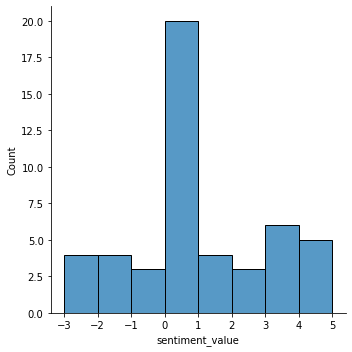

In [41]:
import seaborn as sns
sns.displot(pavilion_df["sentiment_value"])

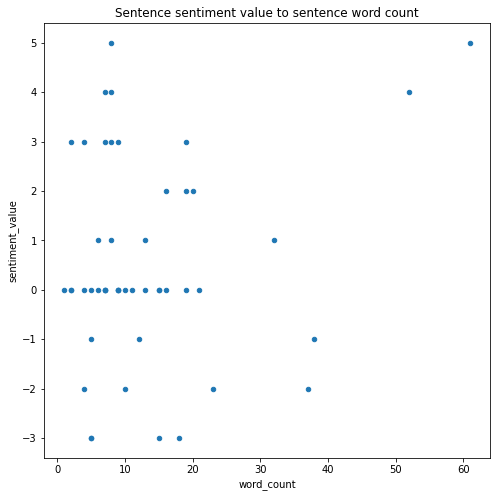

In [42]:
pavilion_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

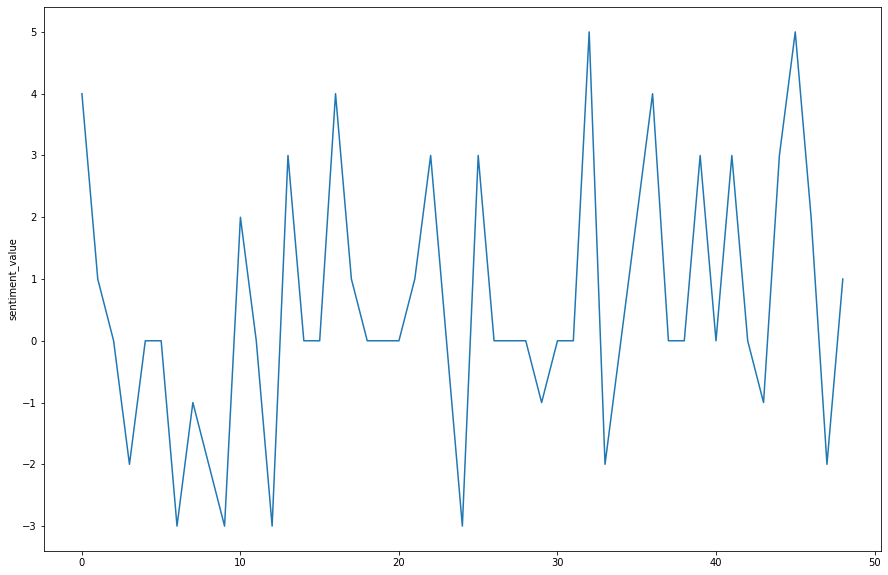

In [43]:
plt.figure(figsize=(15,10))
sns.lineplot(x=pavilion_df.index,y='sentiment_value',data=pavilion_df)

In [44]:
from wordcloud import WordCloud
ip_rev_string = " ".join(pavilion_df["review_comments"])

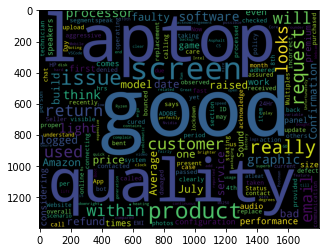

In [45]:
wordcloud_ip = WordCloud(background_color='black',width=1800,height=1400).generate(ip_rev_string)
plt.imshow(wordcloud_ip)